# Load data
Skip this step if csv is already in the environment. ALERT: There are 5M instances in the original dataset.

In [ ]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.5 MB/s eta 0:00:00


In [ ]:
!pip install -U huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [ ]:
import torch
from datasets import load_dataset

In [ ]:
# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(device)

cuda


In [ ]:
# Load the dataset
# dataset = load_dataset("roskoN/dstc8-reddit-corpus", split="training")

In [ ]:
# print(dataset)

Dataset({
    features: ['id', 'domain', 'task_id', 'bot_id', 'user_id', 'turns'],
    num_rows: 5085113
})


In [ ]:
# print(dataset[5000])

{'id': 'd2b2094a3d227df6af598dbcdd6d1997', 'domain': 'trueoffmychest', 'task_id': 'ce91ba86', 'bot_id': '', 'user_id': '', 'turns': ["I'm so tired of being a guy who doesn't care for sports. <selfbr> So I played sports growing up and I'll watch them from time to time but not nearly to the same levels as other guys do and I feel like such an outcast for it sometimes. Growing up my dad did watch football but sports were only ever on on Sundays and it was just football. When I played baseball we occasionally went to games or had games on but having random games on never happened and we never had Sportscenter on. \n\nNow don't get me wrong, I have nothing against sports, I love playing sports but I never understood the entertainment to be had by watching them. I mean I guess I understand being part of a team and loyalty or just enjoying it for the experience but none of that has ever appealed to me. \n\nWhenever I have roommates, sports are pretty much always on the TV. I've never not had 

In [ ]:
# len(dataset)

5085113

# Filter Spider(s) Data
Extract data that contains "spider" or "spiders" in converstations, and save the data to drive for future use.

In [ ]:
from tqdm import tqdm
import re

# Define the function to check for "spider" or "spiders"
# Skip this part if csv is in the environment.

# def contains_spider(text_list):
#     combined_text = " ".join(text_list)
#     return bool(re.search(r"\bspiders?\b", combined_text, re.IGNORECASE))

# spider_data = dataset.filter(lambda x: contains_spider(x["turns"]), desc="Filtering for 'spider'", batch_size=1000)

# print(f"Number of entries containing 'spider' or 'spiders': {len(spider_data)}")
# print(spider_data[:3])

In [ ]:
# len(spider_data)

15524

In [ ]:
# Save as CSV
# spider_data.to_csv("spider_data.csv")

Creating CSV from Arrow format:   0%|          | 0/16 [00:00<?, ?ba/s]

49269287

In [ ]:
# !cp spider_data.csv /content/drive/MyDrive/

In [ ]:
# from google.colab import files
# files.download("spider_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv("/content/drive/MyDrive/spider_data.csv")

# EDA

In [ ]:
print(df.head())

                                 id          domain   task_id  bot_id  \
0  3f8825124dff50c1954a27bb2db09769         tattoos  659c44f7     NaN   
1  87aaee14e3351a6d34318fe5600da61e  trueoffmychest  ce91ba86     NaN   
2  38cd132b335e951aba1794ed8eafa2e4  trueoffmychest  ce91ba86     NaN   
3  60750dcb50a48f14a9466e2ff3619db7  trueoffmychest  ce91ba86     NaN   
4  192a945ab25803fe1cd180cb9bea3c58  trueoffmychest  ce91ba86     NaN   

   user_id                                              turns  
0      NaN  ['Amor Vincit Omnia (Love Conquers All) - Tyle...  
1      NaN  ['23 Year old disabled dude told he has to go ...  
2      NaN  ['Social "justice" pisses me off so much. [Ver...  
3      NaN  ["I'm tired of the media's reactions to Black ...  
4      NaN  ["I'm tired of the media's reactions to Black ...  


In [ ]:
# Check the overall structure and info of the dataset
df.info()

# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15524 entries, 0 to 15523
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       15524 non-null  object 
 1   domain   15524 non-null  object 
 2   task_id  15524 non-null  object 
 3   bot_id   0 non-null      float64
 4   user_id  0 non-null      float64
 5   turns    15524 non-null  object 
dtypes: float64(2), object(4)
memory usage: 727.8+ KB

Missing values in each column:
id             0
domain         0
task_id        0
bot_id     15524
user_id    15524
turns          0
dtype: int64


In [ ]:
# Show unique counts for categorical column
print("Unique values in 'domain':", df['domain'].nunique())

Unique values in 'domain': 604


In [ ]:
# Length of text in each entry of 'turns'
df['turns_length'] = df['turns'].apply(lambda x: len(x) if isinstance(x, str) else 0)
print(df['turns_length'].describe().astype(int))

count     15524
mean       3095
std        5339
min          48
25%         734
50%        1474
75%        3086
max      163153
Name: turns_length, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

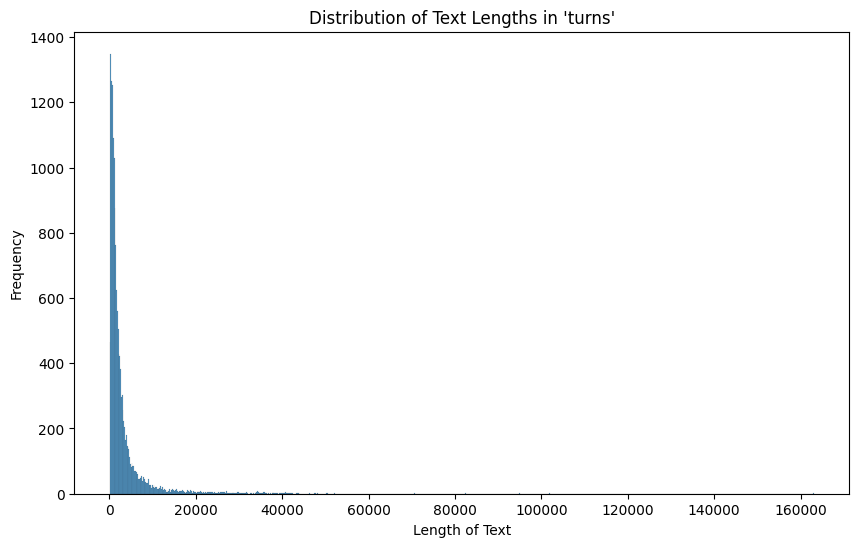

In [ ]:
# Distribution of 'turns_length'
plt.figure(figsize=(10, 6))
sns.histplot(df['turns_length'])
plt.title("Distribution of Text Lengths in 'turns'")
plt.xlabel("Length of Text")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Calculate the IQR for 'turns_length'
Q1 = df['turns_length'].quantile(0.25)
Q3 = df['turns_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'turns_length' is outside the bounds
df_filtered = df[(df['turns_length'] <= upper_bound)]

# Check the result
print("Original DataFrame size:", df.shape)
print("Filtered DataFrame size:", df_filtered.shape)

Original DataFrame size: (15524, 7)
Filtered DataFrame size: (13924, 7)


<ipython-input-14-648f1df849b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['turns_length'] = df_filtered['turns'].apply(lambda x: len(x) if isinstance(x, str) else 0)


count    13924
mean      1744
std       1425
min         48
25%        676
50%       1288
75%       2415
max       6613
Name: turns_length, dtype: int64


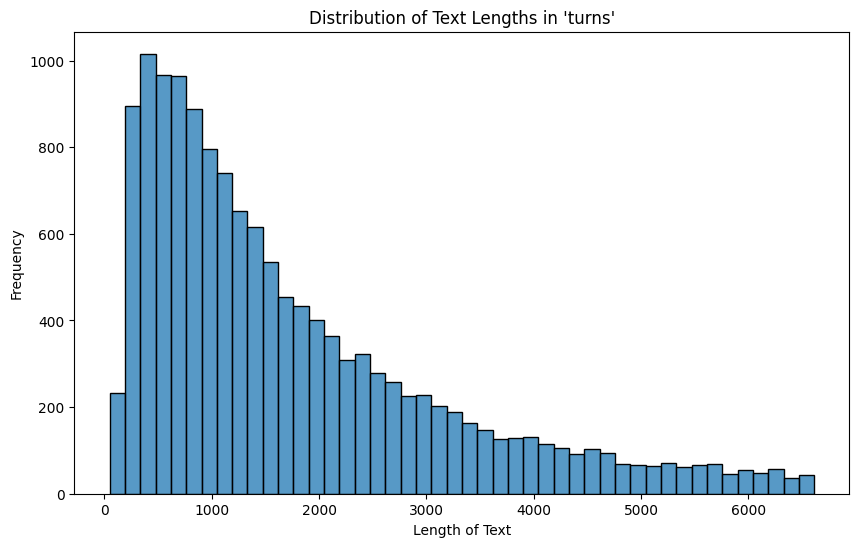

In [ ]:
# Length of text in each entry of 'turns'
df_filtered['turns_length'] = df_filtered['turns'].apply(lambda x: len(x) if isinstance(x, str) else 0)
print(df_filtered['turns_length'].describe().astype(int))

# Distribution of 'turns_length'
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['turns_length'])
plt.title("Distribution of Text Lengths in 'turns'")
plt.xlabel("Length of Text")
plt.ylabel("Frequency")
plt.show()

# Bias Analysis

In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 20.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load spaCy language model
nlp = spacy.load("en_core_web_md")

In [ ]:
# Function to get the axis vector by averaging word vectors
def get_axis_vector(word_list):
    vectors = [nlp(word).vector for word in word_list]
    return np.mean(vectors, axis=0)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
from tqdm import tqdm

# Load transformer model and tokenizer on GPU
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased").to("cuda")

# Define spider-related bias axis (same as before)
axis_words = {
    "aversion": ["fear", "danger", "scary", "disgusting", "creepy"],
    "fascination": ["fascinating", "cute", "lovely", "beneficial", "harmless"]
}

# Function to get axis vector by averaging word vectors
def get_axis_vector(word_list):
    inputs = tokenizer(word_list, padding=True, truncation=True, return_tensors="pt").to("cuda")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).mean(dim=0).cpu().numpy()

# Create bias axis vector for spider-related bias
aversion_vector = get_axis_vector(axis_words["aversion"])
fascination_vector = get_axis_vector(axis_words["fascination"])
bias_axis = aversion_vector - fascination_vector  # Define "aversion-fascination" axis

# Extract individual sentences containing "spider" or "spiders" only
sentences = []
for conversation in tqdm(df_filtered['turns'], desc="Extracting sentences with 'spider' or 'spiders'"):
    # Convert string representation back to a list
    conversation_list = eval(conversation)
    for sentence in conversation_list:
        # Filter sentences containing "spider" or "spiders"
        if "spider" in sentence.lower() or "spiders" in sentence.lower():
            sentences.append(sentence)

# Function to get sentence embeddings on GPU
def get_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to("cuda")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).cpu().numpy()  # Mean pooling for sentence embedding

# Get embeddings for all sentences
sentence_vectors = [get_embedding(sentence)[0] for sentence in tqdm(sentences, desc="Generating embeddings")]

# Parallel cosine similarity calculation with bias axis
bias_scores = Parallel(n_jobs=-1)(
    delayed(lambda vec: cosine_similarity([vec], [bias_axis])[0][0])(vec) for vec in sentence_vectors
)

# Create DataFrame with results
bias_df = pd.DataFrame({"sentence": sentences, "bias_score": bias_scores})
print(bias_df.head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Generating embeddings: 100%|██████████| 13924/13924 [05:05<00:00, 45.51it/s]


                                            sentence  bias_score
0  Amor Vincit Omnia (Love Conquers All) - Tyler ...    0.126197
1  23 Year old disabled dude told he has to go to...    0.163283
2  I don't like Marvel movies. I'm not interested...    0.163151
3  My father is transgender, and it's not awesome...    0.171894
4  My fish died and I feel so fucking bad <selfbr...    0.141507


`sentence`: Contains the individual sentences mentioning "spider" or "spiders" that were extracted from dataset.

`bias_score`: Represents the computed bias score for each sentence based on the "aversion-fascination" axis.

A positive `bias_score` indicates alignment with the "aversion" end (suggesting a more negative or fearful sentiment).
A negative or lower `bias_score` would indicate alignment with "fascination" or neutrality.

In [ ]:
from scipy.stats import ttest_1samp

# Perform a one-sample t-test on bias scores
t_stat, p_value = ttest_1samp(bias_df["bias_score"], 0)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 431.12520902589006
p-value: 0.0


In [ ]:
mean_bias = bias_df["bias_score"].mean()
print(f"Mean bias score: {mean_bias}")

Mean bias score: 0.14133840799331665


# Bootstrap

Bootstrapping by resampling from the scores

In [ ]:
# Number of bootstrap resamples
n_bootstraps = 10000

# Generate bootstrap means
bootstrap_means = []
for _ in range(n_bootstraps):
    resample = np.random.choice(bias_df["bias_score"], size=len(bias_df), replace=True)
    bootstrap_means.append(np.mean(resample))

# Calculate 95% confidence interval
ci_lower, ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])
mean_bias = np.mean(bias_df["bias_score"])

print(f"Mean bias score: {mean_bias}")
print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")

Mean bias score: 0.14133840799331665
95% Confidence Interval: (0.14069844521582126, 0.14196668714284896)


# Topic Modeling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Extract individual sentences that contain "spider" or "spiders" from each 'turns' list
sentences = []  # Store only relevant sentences here
for conversation in df_filtered['turns']:
    # Convert the string representation of the list back to a list
    conversation_list = eval(conversation)
    for sentence in conversation_list:
        # Include sentence only if it contains "spider" or "spiders"
        if "spider" in sentence.lower() or "spiders" in sentence.lower():
            sentences.append(sentence)

In [ ]:
# Preprocess the text data
stop_words = set(stopwords.words("english"))

In [ ]:
def preprocess(text):
    # Convert to lowercase and remove stop words
    text = text.lower()
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

In [ ]:
processed_sentences = [preprocess(sentence) for sentence in sentences]

# Vectorize the text for LDA
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words="english")
dtm = vectorizer.fit_transform(processed_sentences)

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Set number of topics to 5
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Display the topics
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")

Topic #1:
['good', 'time', 'game', 'people', 've', 'know', 'think', 'spider', 'really', 'like']


Topic #2:
['movie', 'think', 'gt', 'www', 'like', 'marvel', 'com', 'https', 'spider', 'man']


Topic #3:
['level', 'time', 'players', 'spider', 'make', 'damage', 'use', 'game', 'like', 'gt']


Topic #4:
['way', 'away', 'eyes', 'room', 'spider', 'know', 'said', 'time', 'like', 'amp']


Topic #5:
['good', 'card', 'like', 'play', 'wiki', 'www', 'http', 'deck', 'https', 'com']


